# Graph Definition
## 次数
* ノードに接続するエッジの数
* 有向グラフの場合は入次数（いりじすう）と出次数（しゅつじすう）がある
* 次数が多い→そのノードが集団の中でのハブである、とみなせる

## 中心性
### 次数中心性
* 次数の高いものを評価
* ノードiの次数 / 全ノード数 - 1

### 媒介中心性
* 流通の要衝を評価

### page rank
* リンクを多く貼られているページは高く評価
* リンクを乱発しているようなページは低く評価
* 多くのページにリンクを貼られているページからリンクを貼られているページは高く評価

## 探索
* 深さ優先探索　・・・行けなくなったら一個戻る
* 幅優先探索　・・・近い点から順に探索

## ダイクストラ法(Dijkstra)
* なぜn - 1か
  * 自身を引く

In [7]:
bin(28)

'0b11100'

In [22]:
# 行列の作成
matrix = [[0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0]]
matrix

[[0, 0, 0, 0, 0, 1, 1],
 [0, 0, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 0, 0]]

In [15]:
# 辺リストの作成
edge_list = ([0, 5], [0, 6], [1, 2], [1, 6], [2, 3], [3, 4], [4, 5])
edge_list

([0, 5], [0, 6], [1, 2], [1, 6], [2, 3], [3, 4], [4, 5])

In [23]:
# 各ノードの次数
{ 0: 2, 1: 3, 2: 2, 3: 3, 4: 2, 5: 3, 6: 3}

{0: 2, 1: 3, 2: 2, 3: 3, 4: 2, 5: 3, 6: 3}

In [36]:
import numpy as np
def Dijkstra(adj_matrix, start):
    # initialize
    d = {}
    prev = {}
    V = range(1, len(adj_matrix) + 1)
    V = set(V)
    
    for element in V:
        d[element] = 100000
        if element == start:
            d[element] = 0
        prev[element] = None
    Q = d.copy()
            
    while not len(Q) == 0:
        u = min(Q, key = Q.get)
        del Q[u]
        print(Q)
        for i in range(len(adj_matrix[u - 1])):
            if not adj_matrix[u - 1, i] == 0:
                if d[i + 1] > d[u] + adj_matrix[u - 1, i]:
                    d[i + 1] + d[u] + adj_matrix[u - 1, i]
                    prev[i + 1] = u
    return d

A = "023000200200300440024005004004000540"
A = list(A)
A = np.asarray(A, dtype = float)
n = int(len(A) ** 0.5)
A = np.reshape(A, (n, n))
print(A)
print(Dijkstra(A, 1))

[[0. 2. 3. 0. 0. 0.]
 [2. 0. 0. 2. 0. 0.]
 [3. 0. 0. 4. 4. 0.]
 [0. 2. 4. 0. 0. 5.]
 [0. 0. 4. 0. 0. 4.]
 [0. 0. 0. 5. 4. 0.]]
{2: 100000, 3: 100000, 4: 100000, 5: 100000, 6: 100000}
{3: 100000, 4: 100000, 5: 100000, 6: 100000}
{4: 100000, 5: 100000, 6: 100000}
{5: 100000, 6: 100000}
{6: 100000}
{}
{1: 0, 2: 100000, 3: 100000, 4: 100000, 5: 100000, 6: 100000}


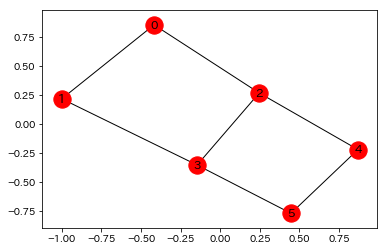

In [48]:
import networkx as nx

G = nx.Graph(A)
G.degree()
nx.draw_networkx(G)

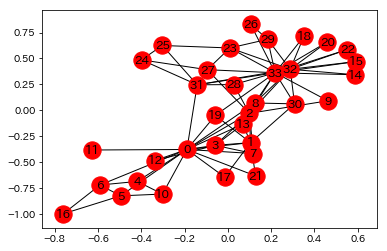

In [56]:
# karate_club_graph
G = nx.karate_club_graph()
nx.draw_networkx(G)

In [57]:
degree_centers = nx.degree_centrality(G)
sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727)]

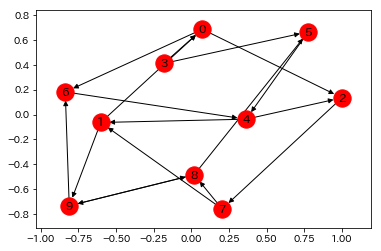

In [65]:
# Digraph
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_path([3, 5, 4, 1, 0, 2, 7, 8, 9, 6])
G.add_path([3, 0, 6, 4, 2, 7, 1, 9, 8, 5])

nx.draw_networkx(G)
plt.show()

In [60]:
# 重み付きグラフ
[
    [0, 2, 3, 0, 0, 0],
    [2, 0, 0, 2, 0, 0],
    [3, 0, 0, 4, 0, 0],
    [0, 2, 4, 0, 0, 5],
    [0, 0, 4, 0, 0, 4],
    [0, 0, 0, 5, 4, 0],
]

# 辺リスト(from, to, weight)
[
    (1, 2, 2),
    (1, 3, 3),
    (2, 4, 2),
    (3, 4, 4),
    (3, 5 ,4),
    (4, 6, 5),
    (5, 6, 4),
]

[(1, 2, 2), (1, 3, 3), (2, 4, 2), (3, 4, 4), (3, 5, 4), (4, 6, 5), (5, 6, 4)]

In [70]:
import matplotlib.pyplot as plt
import networkx as nx

A = '0230200230040240'
A = list(A)
n = int(len(A) ** 0.5)
A = np.reshape(A, (n, n))
A = np.asarray(A, dtype = float)
print(A)
G = nx.Graph(A)
print('nodes', G.nodes)
print('edges', G.edges)

# print weight
for edge in G.edges:
    print(G[edge[0]][edge[1]])
    
G[1]

[[0. 2. 3. 0.]
 [2. 0. 0. 2.]
 [3. 0. 0. 4.]
 [0. 2. 4. 0.]]
nodes [0, 1, 2, 3]
edges [(0, 1), (0, 2), (1, 3), (2, 3)]
{'weight': 2.0}
{'weight': 3.0}
{'weight': 2.0}
{'weight': 4.0}


AtlasView({0: {'weight': 2.0}, 3: {'weight': 2.0}})

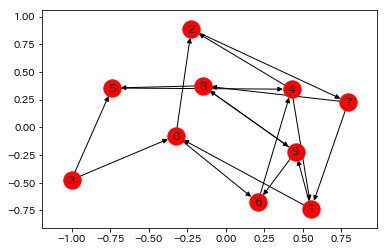